Import libraries

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load Data

In [69]:
df=pd.read_csv(r"D:\SQL tutorial in DATA ANALYST\project_DA_26_01_2026\supermarket_sales_dataset\supermarket.csv")

Inspect Data

In [70]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [71]:
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [73]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [74]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [75]:
df_clean=df.copy()
columns_date=[col for col in df_clean.columns if "Date" in col]
for col in columns_date:
    df_clean[col]=pd.to_datetime(df_clean[col],dayfirst=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [76]:
df_clean.duplicated().sum()

np.int64(0)

### KPIs

Total Sales

In [77]:
total_sale=df_clean["Sales"].sum()
print("Supermarket total sales:",total_sale.round(2))

Supermarket total sales: 2261536.78


Total Orders

In [78]:

print("Supermarket total order:",len(df_clean))

Supermarket total order: 9800


Avg Order Value

In [79]:
avg_order_value=df['Sales'].mean()
print("Supermarket average sale:",avg_order_value)

Supermarket average sale: 230.76905945918367


### Charts Design

Monthly Trend

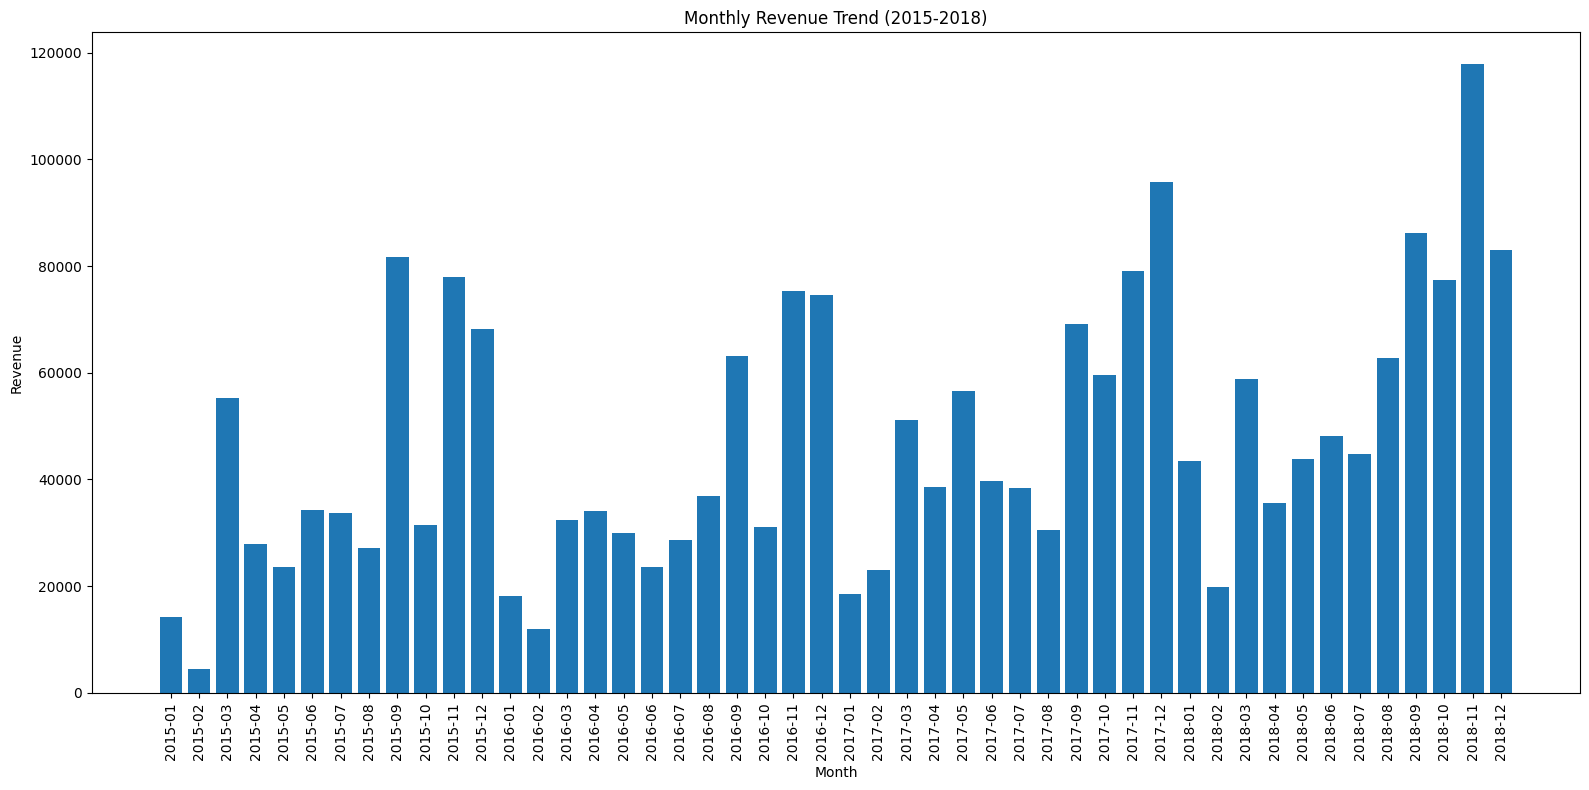

In [80]:
df_clean["Year Month"]=df_clean["Order Date"].dt.to_period("M").astype(str)
monthly_revenue=df_clean.groupby("Year Month")["Sales"].sum().reset_index()


plt.figure(figsize=[16,8])
plt.bar(monthly_revenue["Year Month"], monthly_revenue["Sales"])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend (2015-2018)")
plt.tight_layout()
plt.show()

Revenue is seasonal, especially with a sharp increase at the end of the year 

→ therefore, focus inventory and marketing efforts on Q4.

Daily Trend

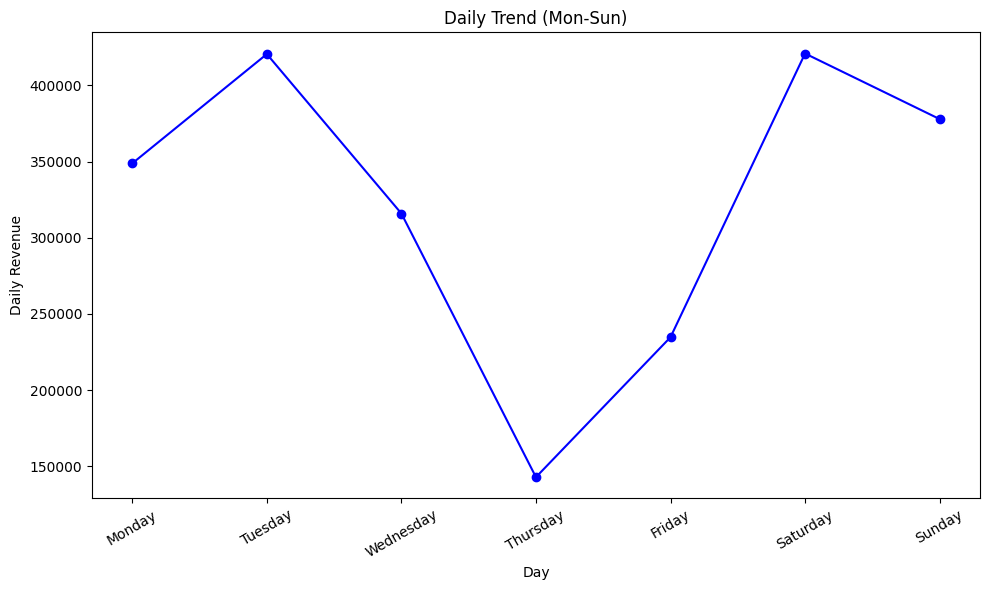

In [81]:
df_clean["Day Name"]=df_clean["Order Date"].dt.day_name()
daily_revenue=df_clean.groupby("Day Name")["Sales"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=[10,6])
plt.plot(daily_revenue.index,daily_revenue.values,marker="o",color="b")
plt.xticks(rotation=30)
plt.xlabel("Day")
plt.ylabel("Daily Revenue")
plt.title("Daily Trend (Mon-Sun)")
plt.tight_layout()
plt.show()

Shopping behavior tends to be concentrated at the end of the week and the beginning of the week 

→ Promotions could be pushed mid-week to balance traffic.

Total Sales by Sup-Category

In [82]:
fig=px.bar(
    df_clean.groupby("Sub-Category",as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False),
    x="Sales",
    y="Sub-Category",
    orientation="h",
    title="Revenue by Sub-Category"
    
)

fig.update_layout(
    height=600,
    yaxis=dict(autorange="reversed"),
    
)
fig.show()

Top-selling product groups generate high revenue 

-> therefore, stock up on these best-selling products

   offer discounts and promotions when purchasing lower-performing product groups.

### Who are the segment buyers?

In [83]:
segment_revenue=df_clean.groupby("Segment")["Sales"].sum().reset_index()
fig=px.pie(
    segment_revenue,
    values="Sales",
    names="Segment",
    hole=0.5,
    title="Revenue by Segment"
    
)

fig.update_layout(
    height=500,
    margin=dict(t=40,b=40,l=40,r=40)
)
fig.show()

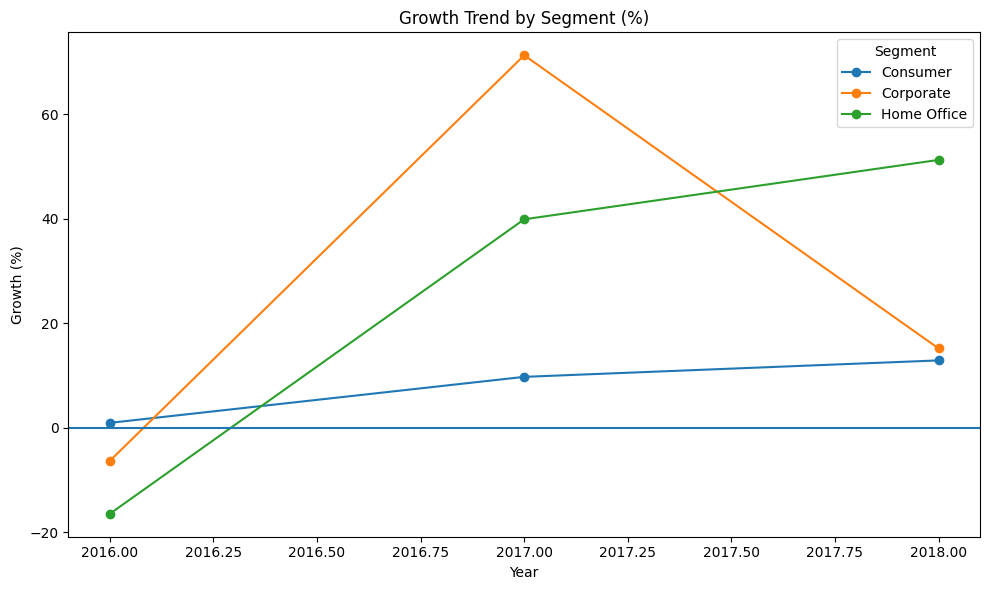

In [84]:

segment_growth = pivot_year.pct_change() * 100

segment_growth.plot(figsize=(10,6), marker="o")

plt.title("Growth Trend by Segment (%)")
plt.ylabel("Growth (%)")
plt.axhline(0)
plt.tight_layout()
plt.show()




Consumers account for over 50% of revenue -> B2C is the core business.


The Home Office segment is growing faster than the Corporate segment, indicating a trend of B2B market fragmentation toward small businesses and individual entrepreneurs.

### Compare delivery times

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

C:\Users\PC\AppData\Local\Temp\ipykernel_2692\831576758.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




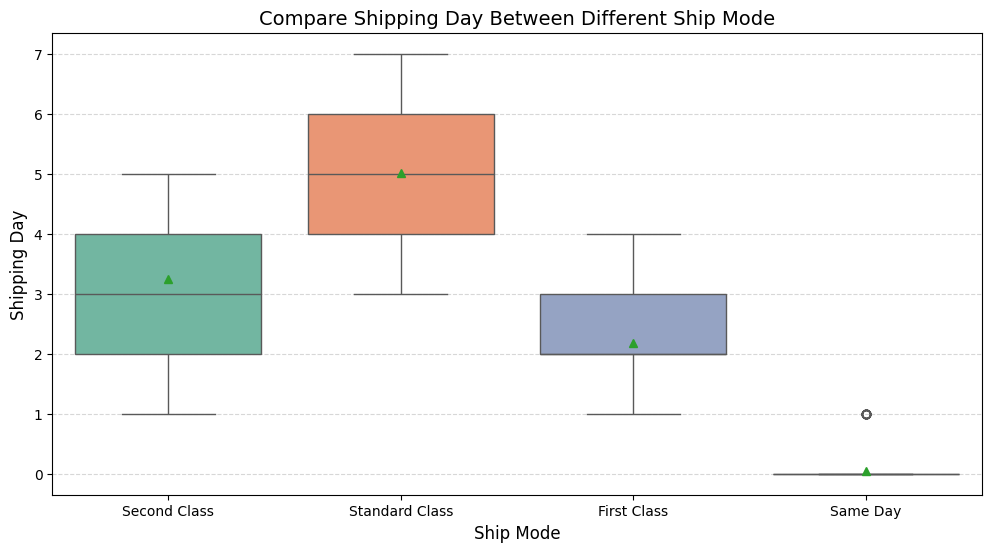

In [86]:
df_clean["Shipping Day"]=(df_clean["Ship Date"]-df_clean["Order Date"]).dt.days

plt.figure(figsize=(12,6))


sns.boxplot(
    data=df_clean,
    x="Ship Mode",
    y="Shipping Day",
    palette="Set2",
    showmeans=True
)

plt.title("Compare Shipping Day Between Different Ship Mode", fontsize=14)
plt.xlabel("Ship Mode",fontsize=12)
plt.ylabel("Shipping Day",fontsize=12)
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.show()

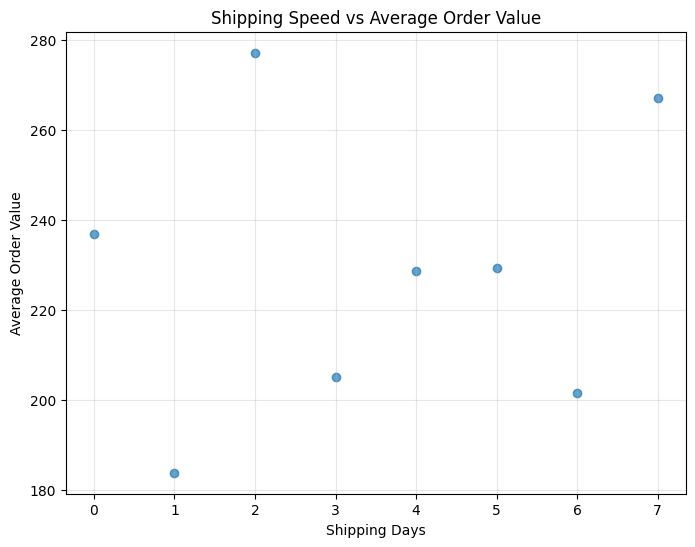

In [87]:
shipping_sales = (
    df_clean
    .groupby("Shipping Day")["Sales"]
    .mean()
    .reset_index()
)
plt.figure(figsize=(8,6))
plt.scatter(
    shipping_sales["Shipping Day"],
    shipping_sales["Sales"],
    alpha=0.7
)

plt.xlabel("Shipping Days")
plt.ylabel("Average Order Value")
plt.title("Shipping Speed vs Average Order Value")
plt.grid(alpha=0.3)
plt.show()


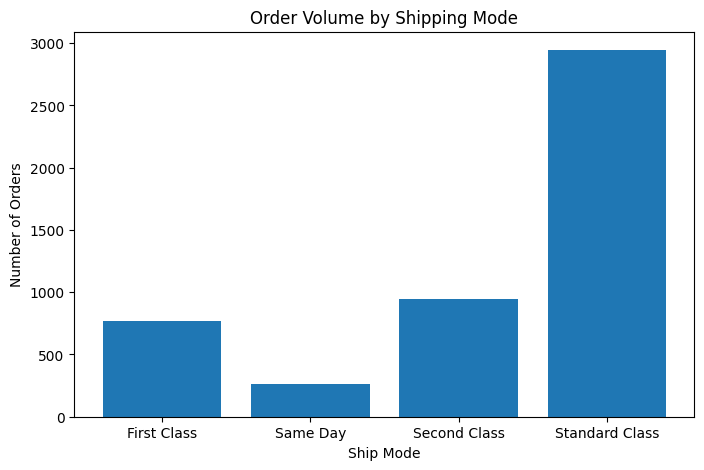

In [88]:
shipmode_summary = (
    df_clean
    .groupby("Ship Mode")
    .agg(
        avg_shipping_day=("Shipping Day", "mean"),
        order_count=("Order ID", "nunique"),
        avg_order_value=("Sales", "mean")
    )
    .reset_index()
)

shipmode_summary
plt.figure(figsize=(8,5))
plt.bar(
    shipmode_summary["Ship Mode"],
    shipmode_summary["order_count"]
)

plt.xlabel("Ship Mode")
plt.ylabel("Number of Orders")
plt.title("Order Volume by Shipping Mode")
plt.show()


If Standard accounts for the majority:

-> Customers are not sensitive to delivery time.

-> They prioritize cost over speed.

->To optimize operating costs, focus on the most common ship mode.

### Quarter Performance Summary

In [89]:
df_clean["Quarter"]=df_clean["Order Date"].dt.to_period("Q").astype(str)
quarter_summary=(
    df_clean.groupby("Quarter",as_index=False).agg(
        Total_Sales=("Sales","sum"),
        Avg_Sales=("Sales","mean"),
        Total_Order=("Order Date","count")
    )
)
quarter_summary["Total_Sales"]=quarter_summary["Total_Sales"].round(2)
quarter_summary["Avg_Sales"]=quarter_summary["Avg_Sales"].round(2)
quarter_summary

,Quarter,Total_Sales,Avg_Sales,Total_Order
0,2015Q1,73931.40,266.90,277
1,2015Q2,85874.09,224.80,382
2,2015Q3,142522.61,256.80,555
3,2015Q4,177528.11,240.23,739
4,2016Q1,62357.69,250.43,249
5,2016Q2,87713.37,203.51,431
6,2016Q3,128560.21,222.04,579
7,2016Q4,180804.74,227.14,796
8,2017Q1,92686.36,278.34,333
9,2017Q2,135061.16,230.87,585


Sales show a clear seasonal pattern, with Q4 consistently generating the highest revenue across years.

The revenue peak in Q4 is mainly driven by a significant increase in order volume, while average order value remains relatively stable.

This indicates that sales growth is volume-driven rather than price-driven, suggesting strong seasonal demand instead of pricing effects.

In [109]:
df_clean["Year"]=df_clean["Order Date"].dt.year.astype(str)

year_summary=df_clean.groupby("Year")["Sales"].sum().reset_index()
year_summary["YoY_Growth_%"] = (
    year_summary["Sales"]
    .pct_change(1) * 100
).round(2)

year_summary

,Year,Sales,YoY_Growth_%
0,2015,479856.2081,NaN
1,2016,459436.0054,-4.26
2,2017,600192.5500,30.64
3,2018,722052.0192,20.30


Orders per customer + Revenue per customer

In [91]:
customer_summary = (
    df_clean
    .groupby("Customer ID")
    .agg(
        total_orders=("Order ID", "nunique"),
        total_revenue=("Sales", "sum")
    )
    .reset_index()
)

customer_summary.sort_values("total_revenue",ascending=False).head()


,Customer ID,total_orders,total_revenue
700,SM-20320,5,25043.050
741,TC-20980,5,19052.218
621,RB-19360,6,15117.339
730,TA-21385,4,14595.620
6,AB-10105,10,14473.571


Top 5 Cities Revenue

In [92]:
top5_cities_revenue=df_clean.groupby("City",as_index=False)["Sales"].sum().sort_values("Sales",ascending=False)
top5_cities_revenue.head(5)

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749


In [93]:
df_clean.to_csv("supermarket_sale.csv",index=False)